## YOY Growth Data

In [ ]:
# Import necessary libraries
from IPython.core.magic import register_cell_magic
from IPython.display import Markdown
from datetime import date
import calplot
import glob
import json
import logging
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
import os

# Register a cell magic for Markdown
@register_cell_magic
def markdown(line, cell):
    return Markdown(cell.format(**globals()))

# Configure logging and warnings
logging.getLogger('matplotlib.font_manager').disabled = True
warnings.filterwarnings("ignore")

# Set pandas display options
pd.set_option('display.width', 500)
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 10)

# Set the path to the shared data file
data_path = '../../data/nvd.jsonl'
if not os.path.exists(data_path):
    raise FileNotFoundError(f"Data file not found at {data_path}. Please run 'python ../../download_data.py' to download the latest data.")

In [3]:
def get_nested_value(entry, keys, default='Missing_Data'):
    try:
        for key in keys:
            entry = entry[key]
        return entry
    except (KeyError, IndexError):
        return default

row_accumulator = []
for filename in glob.glob('nvd.jsonl'):
    with open(filename, 'r', encoding='utf-8') as f:
        nvd_data = json.load(f)
        for entry in nvd_data:
            new_row = {
                'CVE': get_nested_value(entry, ['cve', 'id']),
                'Published': get_nested_value(entry, ['cve', 'published']),
                'AttackVector': get_nested_value(entry, ['cve', 'metrics', 'cvssMetricV31', 0, 'cvssData', 'attackVector']),
                'AttackComplexity': get_nested_value(entry, ['cve', 'metrics', 'cvssMetricV31', 0, 'cvssData', 'attackComplexity']),
                'PrivilegesRequired': get_nested_value(entry, ['cve', 'metrics', 'cvssMetricV31', 0, 'cvssData', 'privilegesRequired']),
                'UserInteraction': get_nested_value(entry, ['cve', 'metrics', 'cvssMetricV31', 0, 'cvssData', 'userInteraction']),
                'Scope': get_nested_value(entry, ['cve', 'metrics', 'cvssMetricV31', 0, 'cvssData', 'scope']),
                'ConfidentialityImpact': get_nested_value(entry, ['cve', 'metrics', 'cvssMetricV31', 0, 'cvssData', 'confidentialityImpact']),
                'IntegrityImpact': get_nested_value(entry, ['cve', 'metrics', 'cvssMetricV31', 0, 'cvssData', 'integrityImpact']),
                'AvailabilityImpact': get_nested_value(entry, ['cve', 'metrics', 'cvssMetricV31', 0, 'cvssData', 'availabilityImpact']),
                'BaseScore': get_nested_value(entry, ['cve', 'metrics', 'cvssMetricV31', 0, 'cvssData', 'baseScore'], '0.0'),
                'BaseSeverity': get_nested_value(entry, ['cve', 'metrics', 'cvssMetricV31', 0, 'cvssData', 'baseSeverity']),
                'ExploitabilityScore': get_nested_value(entry, ['cve', 'metrics', 'cvssMetricV31', 0, 'exploitabilityScore']),
                'ImpactScore': get_nested_value(entry, ['cve', 'metrics', 'cvssMetricV31', 0, 'impactScore']),
                'CWE': get_nested_value(entry, ['cve', 'weaknesses', 0, 'description', 0, 'value']),
                'Description': get_nested_value(entry, ['cve', 'descriptions', 0, 'value'], ''),
                'Assigner': get_nested_value(entry, ['cve', 'sourceIdentifier']),
                'Tag': get_nested_value(entry, ['cve', 'cveTags', 0, 'tags'], np.nan),
                'Status': get_nested_value(entry, ['cve', 'vulnStatus'], '')
            }
            row_accumulator.append(new_row)

nvd = pd.DataFrame(row_accumulator)
nvd = nvd[~nvd.Status.str.contains('Rejected')]
nvd['Published'] = pd.to_datetime(nvd['Published'])
Year_2025 = ((nvd['Published'] > '2025-01-01') & (nvd['Published']  < '2025-05-01'))
Year_2024 = ((nvd['Published'] > '2024-01-01') & (nvd['Published']  < '2025-01-01'))
Year_2023 = ((nvd['Published'] > '2023-01-01') & (nvd['Published']  < '2024-01-01'))
Year_2022 = ((nvd['Published'] > '2022-01-01') & (nvd['Published']  < '2023-01-01'))
Year_2021 = ((nvd['Published'] > '2021-01-01') & (nvd['Published']  < '2022-01-01'))
Year_2020 = ((nvd['Published'] > '2020-01-01') & (nvd['Published']  < '2021-01-01'))

nvd['BaseScore'] = pd.to_numeric(nvd['BaseScore']);
nvd['BaseScore'] = pd.to_numeric(nvd['BaseScore']);
nvd['BaseScore'] = nvd['BaseScore'].replace(0, np.nan);

nvd_2025 = nvd.loc[Year_2025]
nvd_2025 = nvd_2025.sort_values(by=['Published'])
nvd_2025 = nvd_2025.reset_index(drop=True)
nvdcount_2025 = nvd_2025['Published'].count()

nvd_2024 = nvd.loc[Year_2024]
nvd_2024 = nvd_2024.sort_values(by=['Published'])
nvd_2024 = nvd_2024.reset_index(drop=True)
nvdcount_2024 = nvd_2024['Published'].count()

nvd_2023 = nvd.loc[Year_2023]
nvd_2023 = nvd_2023.sort_values(by=['Published'])
nvd_2023 = nvd_2023.reset_index(drop=True)
nvdcount_2023 = nvd_2023['Published'].count()

nvd_2022 = nvd.loc[Year_2022]
nvd_2022 = nvd_2022.sort_values(by=['Published'])
nvd_2022 = nvd_2022.reset_index(drop=True)
nvdcount_2022 = nvd_2022['Published'].count()

nvd_2021 = nvd.loc[Year_2021]
nvd_2021 = nvd_2021.sort_values(by=['Published'])
nvd_2021 = nvd_2021.reset_index(drop=True)
nvdcount_2021 = nvd_2021['Published'].count()

nvd_2020 = nvd.loc[Year_2020]
nvd_2020 = nvd_2020.sort_values(by=['Published'])
nvd_2020 = nvd_2020.reset_index(drop=True)
nvdcount_2020 = nvd_2020['Published'].count()

In [4]:
Month_2021 = nvd_2021['Published'].groupby(nvd_2021.Published.dt.to_period("M")).agg('count')
Month_2022 = nvd_2022['Published'].groupby(nvd_2022.Published.dt.to_period("M")).agg('count')
Month_2023 = nvd_2023['Published'].groupby(nvd_2023.Published.dt.to_period("M")).agg('count') 
Month_2024 = nvd_2024['Published'].groupby(nvd_2024.Published.dt.to_period("M")).agg('count')
Month_2025 = nvd_2025['Published'].groupby(nvd_2025.Published.dt.to_period("M")).agg('count')


Month_2021 = Month_2021.reset_index(name="2021")
Month_2021 = Month_2021.rename(columns={"Published": "Month"}, errors="raise")
Month_2021['Month'] = Month_2021['Month'].dt.strftime('%B')

Month_2022 = Month_2022.reset_index(name="2022")
Month_2022 = Month_2022.rename(columns={"Published": "Month"}, errors="raise")
Month_2022['Month'] = Month_2022['Month'].dt.strftime('%B')

Month_2023 = Month_2023.reset_index(name="2023")
Month_2023 = Month_2023.rename(columns={"Published": "Month"}, errors="raise")
Month_2023['Month'] = Month_2023['Month'].dt.strftime('%B')

Month_2024 = Month_2024.reset_index(name="2024")
Month_2024 = Month_2024.rename(columns={"Published": "Month"}, errors="raise")
Month_2024['Month'] = Month_2024['Month'].dt.strftime('%B')

Month_2025 = Month_2025.reset_index(name="2025")
Month_2025 = Month_2025.rename(columns={"Published": "Month"}, errors="raise")
Month_2025['Month'] = Month_2025['Month'].dt.strftime('%B')




In [5]:
Months = pd.merge(Month_2022, Month_2023, how='left')
Months = pd.merge(Months, Month_2024, how='left')
Months = pd.merge(Months, Month_2025, how='left')
Months

,Month,2022,2023,2024,2025
0,January,2016,2337,2595,4280.0
1,February,1942,2122,2778,3680.0
2,March,2058,2516,3310,4018.0
3,April,2046,2330,3623,4039.0
4,May,2021,2418,5006,NaN
5,June,2280,2384,3080,NaN
6,July,1969,2306,3118,NaN
7,August,2317,2477,2900,NaN
8,September,2197,2148,2519,NaN
9,October,1849,2680,3570,NaN


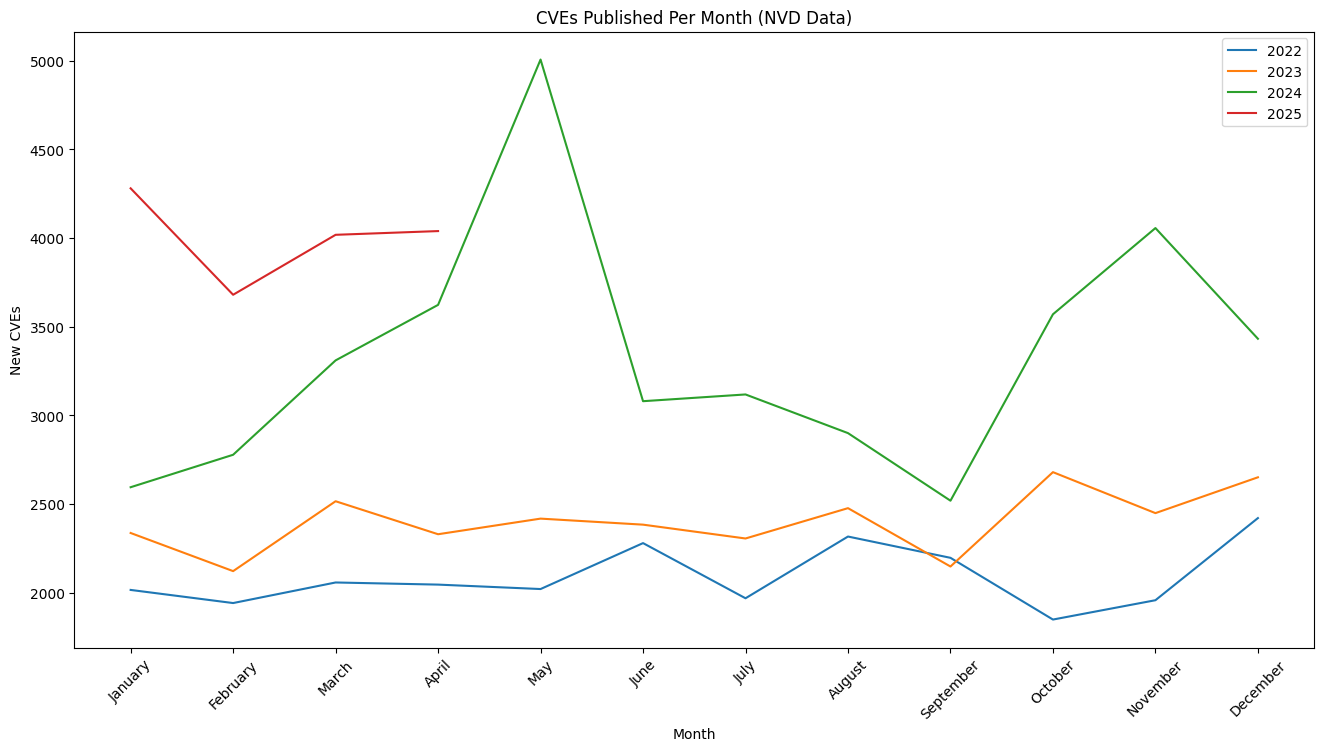

In [6]:
cg = Months.plot(x="Month", figsize=(16, 8), title='CVEs Published Per Month (NVD Data)', stacked=False)
plt.grid()
cg.grid(False)
cg.set_ylabel("New CVEs");
cg.set_xlabel("Month");
x1 = [0,1,2,3,4,5,6,7,8,9,10,11]
squad = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
cg.set_xticks(x1);
cg.set_xticklabels(squad, minor=False, rotation=45);

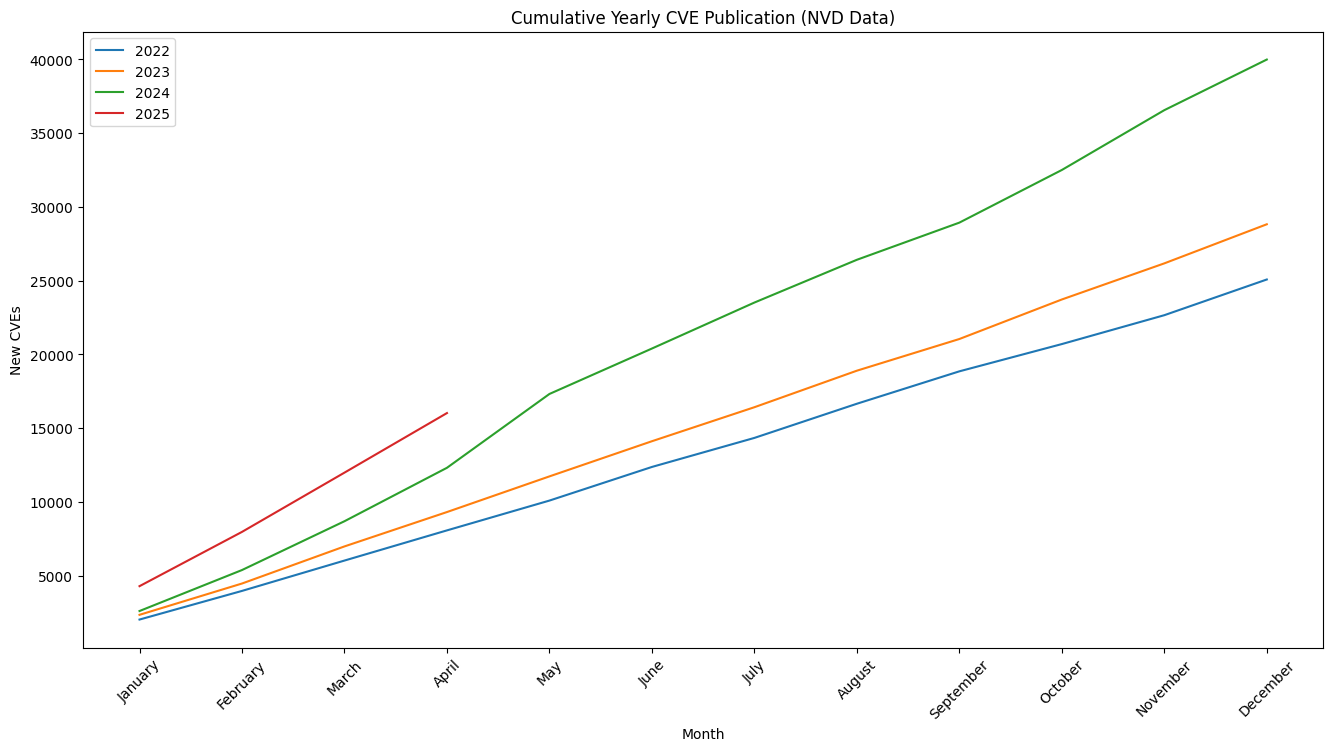

In [7]:
cg = Months.cumsum().plot( figsize=(16, 8), title='Cumulative Yearly CVE Publication (NVD Data)', stacked=False)
plt.grid()
cg.grid(False)
cg.set_ylabel("New CVEs");
cg.set_xlabel("Month");
x1 = [0,1,2,3,4,5,6,7,8,9,10,11]
squad = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
cg.set_xticks(x1);
cg.set_xticklabels(squad, minor=False, rotation=45);